In [58]:
import pandas as pd
df = pd.read_csv('SchvaleniUveru.csv',delimiter=";")

df

,Vek,Zamestnani,Nemovitosti,Splaceni v minulosti,Uver
0,nizke,ne,ne,spatne,neziskal
1,nizke,ano,ne,dobre,neziskal
2,nizke,ano,ne,dobre,ziskal
3,nizke,ano,ano,spatne,ziskal
4,nizke,ne,ne,spatne,neziskal
5,stredni,ne,ne,spatne,neziskal
6,stredni,ne,ne,dobre,neziskal
7,stredni,ano,ano,dobre,ziskal
8,stredni,ne,ano,vyborne,ziskal
9,stredni,ne,ano,vyborne,ziskal


In [59]:
from sklearn import tree

feature_cols = ['Vek', 'Zamestnani', 'Nemovitosti', 'Splaceni v minulosti']
X = df[feature_cols]
y = df['Uver']

X
clf = tree.DecisionTreeClassifier()
one_hot_data = pd.get_dummies(X)
clf.fit(one_hot_data, y)
one_hot_data

,Vek_nizke,Vek_stredni,Vek_vysoke,Zamestnani_ano,Zamestnani_ne,Nemovitosti_ano,Nemovitosti_ne,Splaceni v minulosti_dobre,Splaceni v minulosti_spatne,Splaceni v minulosti_vyborne
0,1,0,0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,1,1,0,0
2,1,0,0,1,0,0,1,1,0,0
3,1,0,0,1,0,1,0,0,1,0
4,1,0,0,0,1,0,1,0,1,0
5,0,1,0,0,1,0,1,0,1,0
6,0,1,0,0,1,0,1,1,0,0
7,0,1,0,1,0,1,0,1,0,0
8,0,1,0,0,1,1,0,0,0,1
9,0,1,0,0,1,1,0,0,0,1


TypeError: 'method' object is not subscriptable

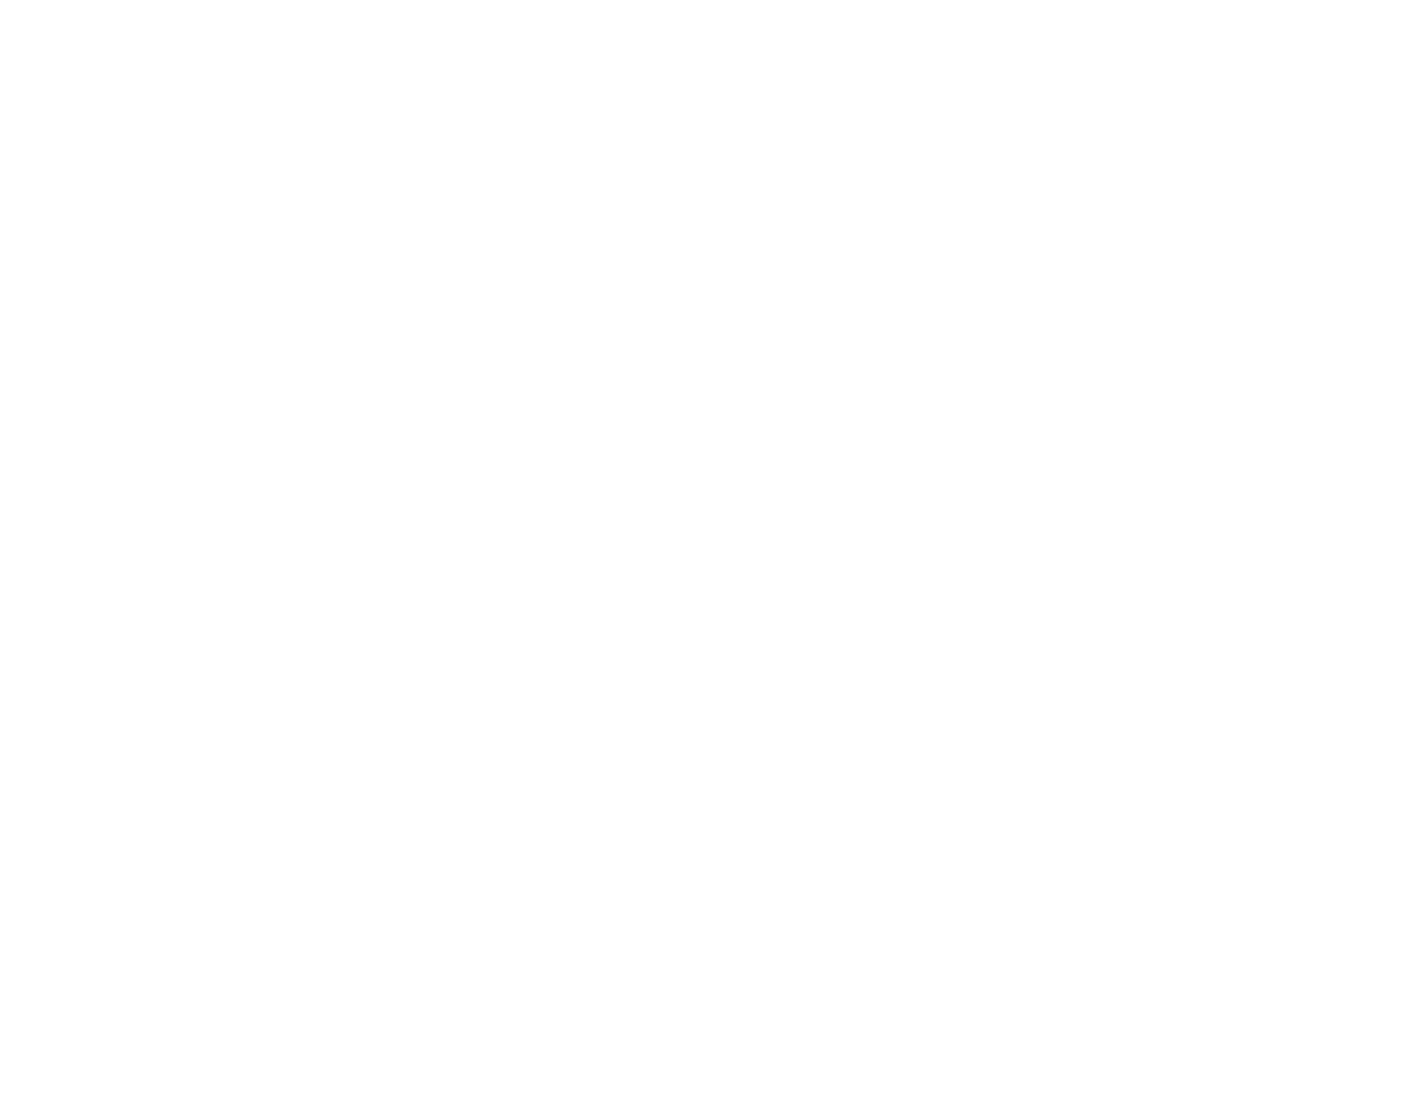

In [60]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=one_hot_data.columns, class_names=y.unique,filled=True)


In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render()

'Source.gv.pdf'

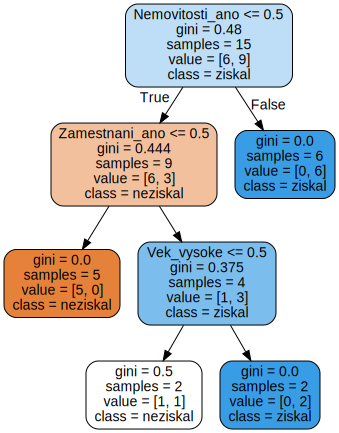

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, 
    class_names=y.unique(),
    feature_names=one_hot_data.columns,
    filled=True, rounded=True)  
graph = graphviz.Source(dot_data)  
graph 


In [ ]:
from sklearn.datasets import load_iris
import numpy as np
iris=load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
len(iris.data)


150

In [ ]:
X=iris.data
y=iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, test_size = 0.2, shuffle=True)
print(f"{len(X_train)}, {len(X_test)}, {len(y_train)}, {len(y_test)}")

112, 38, 112, 38


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

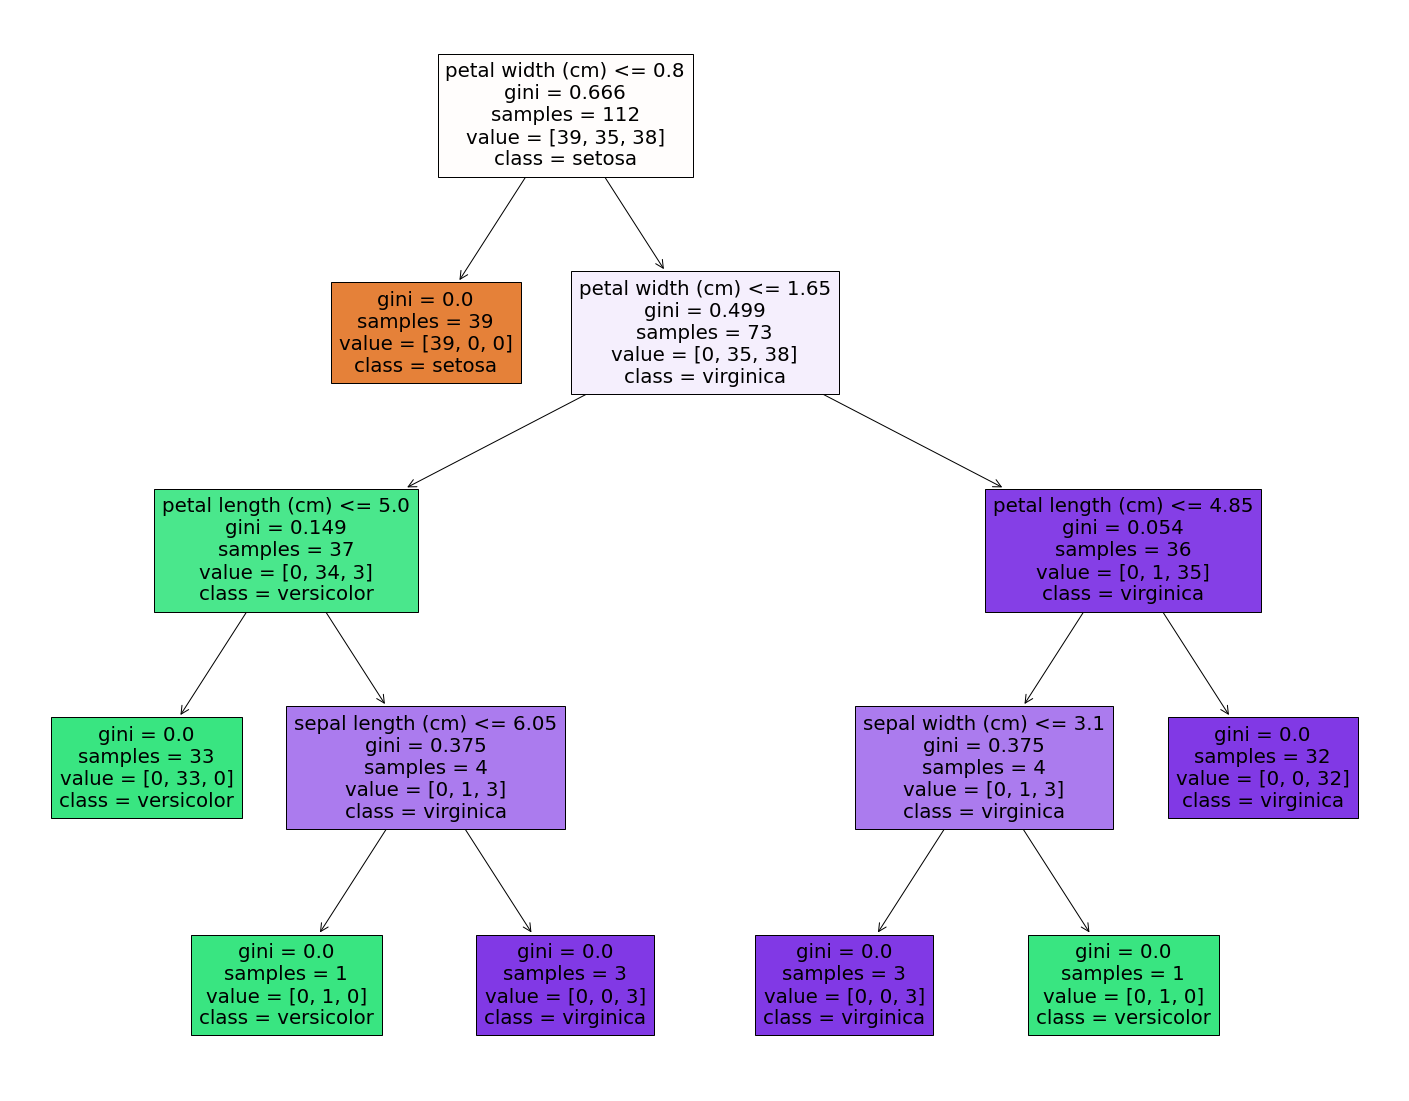

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))
data=[]
for idx,pred in enumerate(clf.predict(X_test)):
    if pred!=y_test[idx]:
        data.append(X_test[idx])
wdf = pd.DataFrame(data, columns = iris.feature_names)
wdf

Train data accuracy: 1.0
Test data accuracy: 0.9473684210526315


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.7,3.0,5.0,1.7
1,6.0,2.2,5.0,1.5


# KNN

In [ ]:
from sklearn.preprocessing import Normalizer
scaler= Normalizer().fit(X_train) 
normalized_x_train= scaler.transform(X_train) 
normalized_x_test= scaler.transform(X_test) 

In [ ]:
print('x train before Normalization')
print(X_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[5.4 3.  4.5 1.5]
 [5.  3.4 1.5 0.2]
 [4.5 2.3 1.3 0.3]
 [4.9 2.4 3.3 1. ]
 [6.5 3.  5.8 2.2]]

x train after Normalization
[[0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80218492 0.54548574 0.24065548 0.0320874 ]
 [0.86093857 0.44003527 0.24871559 0.0573959 ]
 [0.75916547 0.37183615 0.51127471 0.15493173]
 [0.68619022 0.31670318 0.61229281 0.232249  ]]


Text(0.5, 1.08, 'Pair Plot of the dataset After normalization')

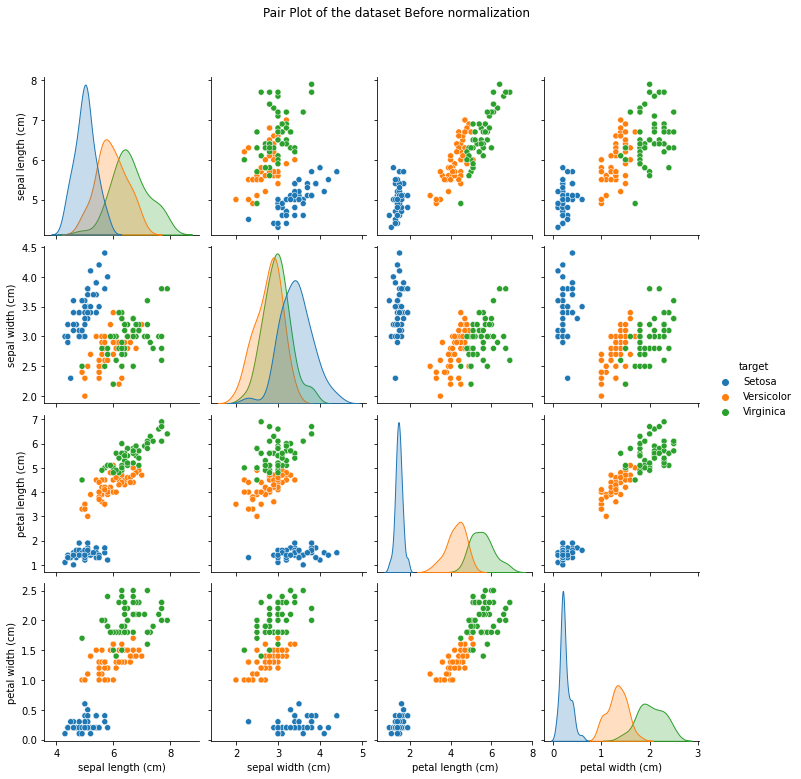

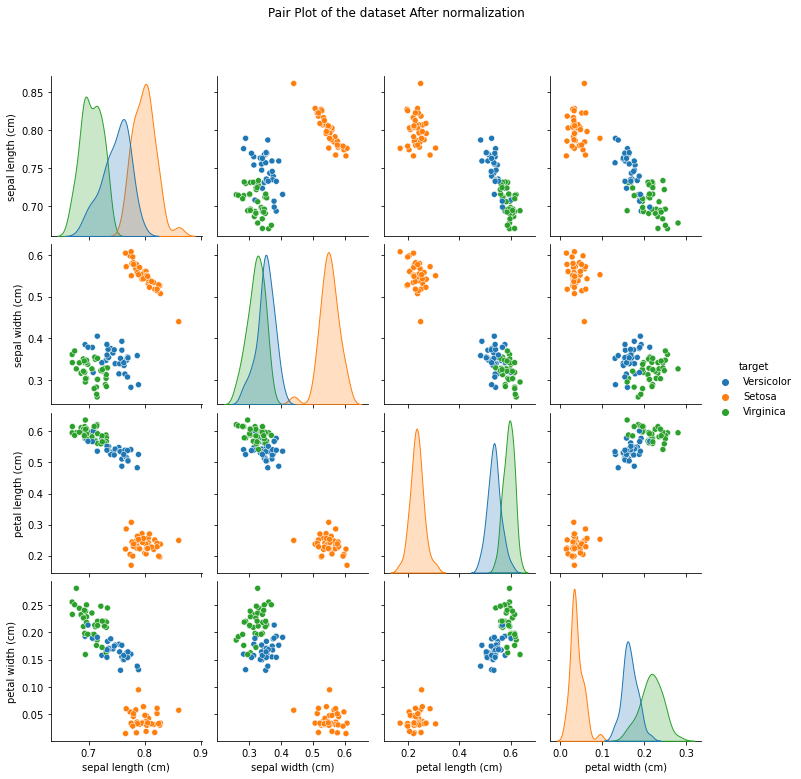

In [ ]:
import seaborn as sns

di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0:'Virginica'} # dictionary

before= sns.pairplot(iris_df.replace({'target': di}), hue= 'target')
before.fig.suptitle('Pair Plot of the dataset Before normalization', y=1.08)

iris_df_2= pd.DataFrame(data= np.c_[normalized_x_train, y_train], columns= iris['feature_names'] + ['target'])
di= {0.0: 'Setosa', 1.0: 'Versicolor', 2.0: 'Virginica'}
after= sns.pairplot(iris_df_2.replace({'target':di}), hue= 'target')
after.fig.suptitle('Pair Plot of the dataset After normalization', y=1.08)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
#knn = KNeighborsClassifier(3)
knn.fit(normalized_x_train, y_train)
y_pred = knn.predict(normalized_x_test)

from sklearn.metrics import accuracy_score
print('Špatně klasifikováno: {}'.format((y_test != y_pred).sum()))
print('Přesnost: {:.1%}'.format(accuracy_score(y_test, y_pred)))

Špatně klasifikováno: 0
Přesnost: 100.0%
